In [3]:
import pandas as pd
%matplotlib inline

In [4]:
! bq query --use_legacy_sql=FALSE 'SELECT trip, start_station_name, end_station_name, count(trip) as trip_freq FROM `ambient-cubist-185918.bike_trips_data.results_20171228_104735` GROUP BY trip, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'


BigQuery error in query operation: Error processing job
'loyal-symbol-251021:bqjob_r30226143306d2a38_0000016d470d62d0_1': Access Denied:
Table ambient-cubist-185918:bike_trips_data.results_20171228_104735: User does
not have permission to query table
ambient-cubist-185918:bike_trips_data.results_20171228_104735.


In [5]:
! bq query --use_legacy_sql=FALSE 'SELECT trip_id, start_station_name, end_station_name, count(trip_id) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY trip_id, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'

Waiting on bqjob_r101a4f17adfa31bb_0000016d470d703f_1 ... (0s) Current status: DONE   
+---------+--------------------+------------------+-----------+
| trip_id | start_station_name | end_station_name | trip_freq |
+---------+--------------------+------------------+-----------+
|  944732 | Mezes              | Mezes            |         1 |
|  984595 | Mezes              | Mezes            |         1 |
|  984596 | Mezes              | Mezes            |         1 |
| 1129385 | Mezes              | Mezes            |         1 |
| 1030383 | Mezes              | Mezes            |         1 |
+---------+--------------------+------------------+-----------+


In [6]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT trip_id, start_station_name, end_station_name, count(trip_id) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY trip_id, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv

Waiting on bqjob_r6b3517f755e67203_0000016d470d867b_1 ... (0s) Current status: DONE   

In [7]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT trip, start_station_name, end_station_name, count(trip) as trip_freq FROM `ambient-cubist-185918.bike_trips_data.results_20171228_104735` GROUP BY trip, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv


In [8]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT trip_id, start_station_name, end_station_name, count(trip_id) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY trip_id, start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv

Waiting on bqjob_r7e86d6de613c43bb_0000016d470dda85_1 ... (0s) Current status: DONE   

In [9]:
pop_trips=pd.read_csv('result.csv')

In [10]:
pop_trips

,trip_id,start_station_name,end_station_name,trip_freq
0,944732,Mezes,Mezes,1
1,984595,Mezes,Mezes,1
2,984596,Mezes,Mezes,1
3,1129385,Mezes,Mezes,1
4,1030383,Mezes,Mezes,1


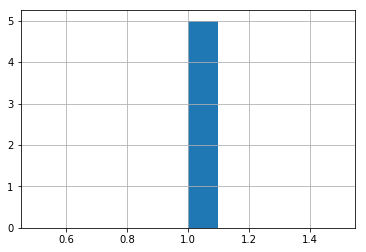

In [11]:
pop_trips.trip_freq.hist()